In [3]:
import pandas as pd 

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex: 0 - Female, 1 - Male
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect




In [4]:

df.drop(columns=["cp","fbs","chol","exang","oldpeak","slope","ca","thal", "restecg"], inplace=True)

In [5]:
df.rename(columns={"thalach":"maxheartrate"}, inplace=True)
df.head()

,age,sex,trestbps,maxheartrate,target
0,52,1,125,168,0
1,53,1,140,155,0
2,70,1,145,125,0
3,61,1,148,161,0
4,62,0,138,106,0


In [24]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
df.corr()

,age,sex,trestbps,restecg,thalach,thal,target
age,1.000000,-0.103240,0.271121,-0.132696,-0.390227,0.072297,-0.229324
sex,-0.103240,1.000000,-0.078974,-0.055117,-0.049365,0.198424,-0.279501
trestbps,0.271121,-0.078974,1.000000,-0.123794,-0.039264,0.059276,-0.138772
restecg,-0.132696,-0.055117,-0.123794,1.000000,0.048411,-0.020504,0.134468
thalach,-0.390227,-0.049365,-0.039264,0.048411,1.000000,-0.098068,0.422895
thal,0.072297,0.198424,0.059276,-0.020504,-0.098068,1.000000,-0.337838
target,-0.229324,-0.279501,-0.138772,0.134468,0.422895,-0.337838,1.000000


<Axes: >

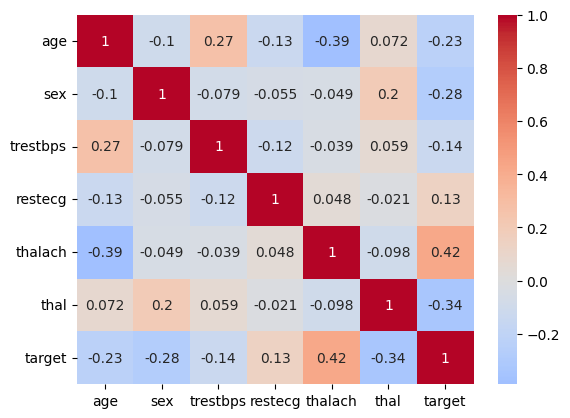

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),annot=True, cmap="coolwarm", center=0)

In [30]:
df.describe()

,age,sex,trestbps,maxheartrate,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,149.114146,0.513171
std,9.072290,0.460373,17.516718,23.005724,0.500070
min,29.000000,0.000000,94.000000,71.000000,0.000000
25%,48.000000,0.000000,120.000000,132.000000,0.000000
50%,56.000000,1.000000,130.000000,152.000000,1.000000
75%,61.000000,1.000000,140.000000,166.000000,1.000000
max,77.000000,1.000000,200.000000,202.000000,1.000000


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x = df.drop(columns=["target"])
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth = 5, random_state=42)
model.fit(x_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(x_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(x_test)))


Accuracy: 0.7951219512195122
Confusion Matrix:
 [[93  9]
 [33 70]]


In [ ]:
import numpy as np
custom_values = [39, 1, 170, 189]
custom_values2 = [45,0,150,160]
custom_values3 = [67,1,170,180]

# Reshape the custom values into a 2D array
custom_input = np.array(custom_values).reshape(1, -1)

# Make the prediction
prediction = model.predict(custom_input)

print(f"\nPrediction for custom values {custom_values}: {prediction}")


Prediction for custom values [39, 1, 170, 189]: [0]


C:\Users\rajee\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
custom_values2 = [45,0,150,160]
custom_values3 = [67,1,170,180]

# Reshape the custom values into a 2D array
custom_input = np.array(custom_values2).reshape(1, -1)

# Make the prediction
prediction = model.predict(custom_input)

print(f"\nPrediction for custom values {custom_values2}: {prediction}")



# Reshape the custom values into a 2D array
custom_input3 = np.array(custom_values3).reshape(1, -1)

# Make the prediction
prediction = model.predict(custom_input3)

print(f"\nPrediction for custom values {custom_values3}: {prediction}")


Prediction for custom values [45, 0, 150, 160]: [1]

Prediction for custom values [67, 1, 170, 180]: [0]


C:\Users\rajee\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajee\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
df.columns

Index(['age', 'sex', 'trestbps', 'maxheartrate', 'target'], dtype='object')

In [53]:
df.describe()

,age,sex,trestbps,maxheartrate,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,149.114146,0.513171
std,9.072290,0.460373,17.516718,23.005724,0.500070
min,29.000000,0.000000,94.000000,71.000000,0.000000
25%,48.000000,0.000000,120.000000,132.000000,0.000000
50%,56.000000,1.000000,130.000000,152.000000,1.000000
75%,61.000000,1.000000,140.000000,166.000000,1.000000
max,77.000000,1.000000,200.000000,202.000000,1.000000


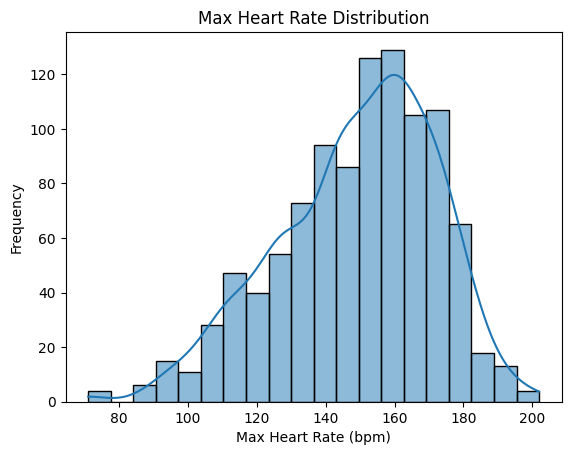

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot max heart rate distribution
sns.histplot(df['maxheartrate'], kde=True)
plt.title("Max Heart Rate Distribution")
plt.xlabel("Max Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.show()


In [60]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming your model is called 'model' and your features are in X
feature_names = x_test.columns.tolist()

# Print the tree structure
tree_rules = export_text(model, feature_names=feature_names)
print(tree_rules)




|--- maxheartrate <= 147.50
|   |--- sex <= 0.50
|   |   |--- trestbps <= 122.00
|   |   |   |--- class: 1
|   |   |--- trestbps >  122.00
|   |   |   |--- age <= 63.50
|   |   |   |   |--- trestbps <= 131.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- trestbps >  131.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  63.50
|   |   |   |   |--- trestbps <= 145.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- trestbps >  145.00
|   |   |   |   |   |--- class: 0
|   |--- sex >  0.50
|   |   |--- maxheartrate <= 142.50
|   |   |   |--- maxheartrate <= 122.50
|   |   |   |   |--- trestbps <= 126.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- trestbps >  126.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- maxheartrate >  122.50
|   |   |   |   |--- maxheartrate <= 123.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- maxheartrate >  123.50
|   |   |   |   |   |--- class: 0
|   |   |--- maxheartrate >  142.50
|   |   |   |--- trestbps <=

In [56]:
x_train.rename(columns={"maxheartrate":"mhr","trestbps":"bp"}, inplace=True)

In [59]:
plt.figure(figsize=(40, 20))
plot_tree(
    model, 
    feature_names=x_train.columns, 
    class_names=["No", "Yes"], 
    filled=True, 
    fontsize=20, 
    rounded=True, 
    impurity=False,  # Hides the Gini value
    proportion=False,
    label='none'# Hides the proportion of classes
)

plt.tight_layout()  # Removes extra whitespace
plt.savefig("decision_tree_large5.png", bbox_inches='tight')  # Saves without margins
plt.show()


C:\Users\rajee\AppData\Local\Temp\ipykernel_9340\61370383.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
